# 선형회귀

## k-최근접 이웃의 한계

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

#훈련세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

이 모델은 50cm 농어의 무게를 1.033g 정도로 예측하였다.<br>
그런데 실제 이 농의 무게는 훨씬 더 많이 나간다고한다.<br>
어디서 문제가 생긴걸까?<br>

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


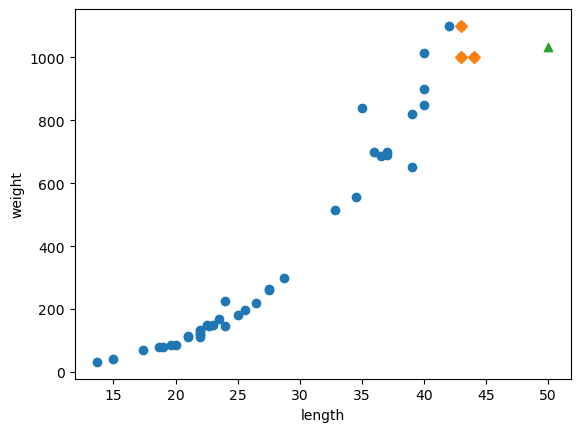

In [6]:
import matplotlib.pyplot as plt

distances,indexes = knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형회귀 모델을 훈련한다.
lr.fit(train_input,train_target)
#50cm 농어에 대해 예측한다.
print(lr.predict([[50]]))


[1241.83860323]


coef와 intercept를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부른다.<br>
많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 모델 기반 학습이라고 부른다.<br>
k-최근접 이웃에는 모델 파라미터가 없다. 훈련세트를 저장하는것이 훈련의 전부이다. 이를 사례 기반 학습이라고 부른다.

In [8]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535474


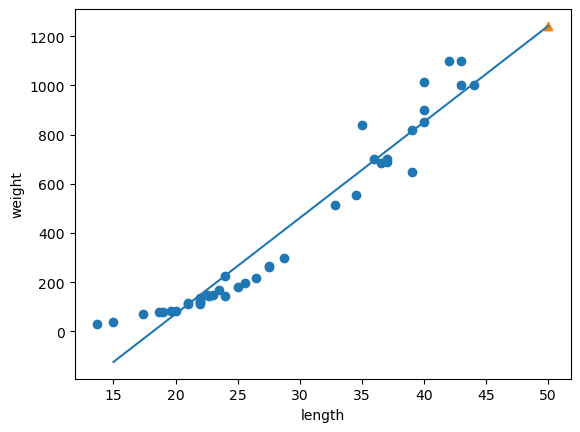

In [9]:
# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input,train_target)

# 15에서 50까지 1차 방정식 그래프를 그린다.
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50 * lr.coef_ + lr.intercept_])

plt.scatter(50,lr.predict([[50]]),marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [10]:
print(lr.score(train_input,train_target)) #훈련 세트
print(lr.score(test_input,test_target)) # 테스트 세트

0.9398463339976041
0.824750312331356


## 다항회귀
선형 회귀가 만든 직선은 왼쪽 아래로 쭉 뻗어있다.<br>
이 직선대로 예측하면 농어의 무게가 0g 이하로 내려갈 텐데 현실에서는 있을 수 없는 일이다. <br>
그렇다면 최적의 직선을 찾기보다 최적의 곡선을 찾으면 어떨까? <br>
<br>
이런 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련세트에 추가되어야 함..

In [11]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [12]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


$ 1.01x^2 - 21.55x +116.06 $

In [13]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


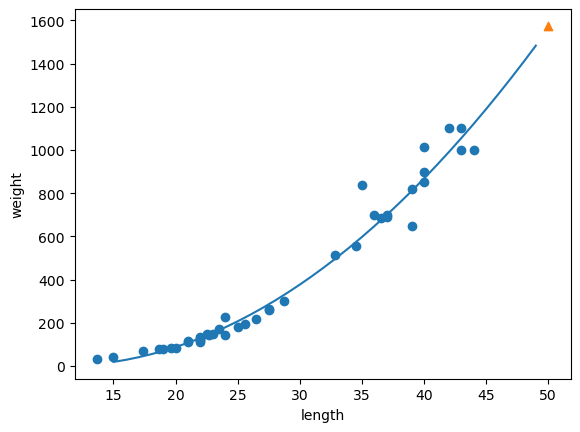

In [14]:
# 구간별 직선을 그리기위해 15에서 49까지 정수 배열을 맏는다.
point = np.arange(15,50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input,train_target)

#15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point,1.01*point ** 2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## QR 분해로 다항회귀 만들어보기 - 연습

In [15]:
# test_poly = np.column_stack((test_input ** 2, test_input))
# qr_testPoly = np.column_stack((np.ones(test_input.size)))
qr_trainPoly = np.column_stack((np.ones(train_input.size),train_input,train_input ** 2))
qr_testpoly = np.column_stack((np.ones(test_input.size),test_input,test_input ** 2))

Q,R = np.linalg.qr(qr_trainPoly)

print(R)
# 선형 방정식 Rw = Qᵗy 풀기
w = np.linalg.solve(R, Q.T @ train_target)
print(w) # [절편, 1차항, 2차항]



[[   -6.4807407   -184.3462122  -5737.49695141]
 [    0.            56.56592656  3378.07008777]
 [    0.             0.          -394.11196757]]
[116.05021078 -21.55792498   1.01433211]


## 다항 회귀 테스트

[]

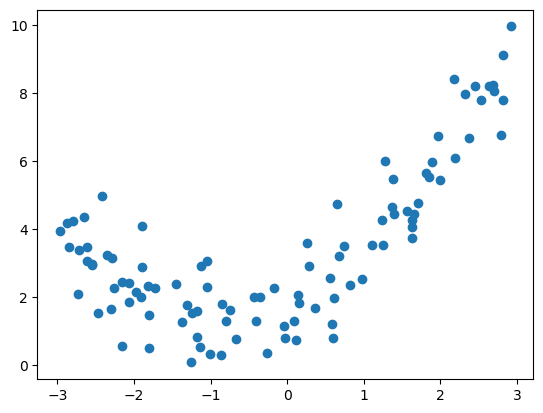

In [34]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y)
plt.plot()

[[3.98072454]
 [3.83900847]
 [3.70128664]
 [3.56755907]
 [3.43782574]
 [3.31208667]
 [3.19034184]
 [3.07259126]
 [2.95883494]
 [2.84907286]
 [2.74330503]
 [2.64153145]
 [2.54375213]
 [2.44996705]
 [2.36017622]
 [2.27437964]
 [2.19257731]
 [2.11476923]
 [2.0409554 ]
 [1.97113582]
 [1.90531049]
 [1.84347941]
 [1.78564258]
 [1.7318    ]
 [1.68195166]
 [1.63609758]
 [1.59423775]
 [1.55637217]
 [1.52250083]
 [1.49262375]
 [1.46674091]
 [1.44485233]
 [1.426958  ]
 [1.41305791]
 [1.40315208]
 [1.39724049]
 [1.39532315]
 [1.39740007]
 [1.40347123]
 [1.41353664]
 [1.42759631]
 [1.44565022]
 [1.46769838]
 [1.49374079]
 [1.52377745]
 [1.55780836]
 [1.59583352]
 [1.63785294]
 [1.6838666 ]
 [1.7338745 ]
 [1.78787666]
 [1.84587307]
 [1.90786373]
 [1.97384864]
 [2.0438278 ]
 [2.11780121]
 [2.19576886]
 [2.27773077]
 [2.36368693]
 [2.45363733]
 [2.54758199]
 [2.6455209 ]
 [2.74745405]
 [2.85338146]
 [2.96330311]
 [3.07721901]
 [3.19512917]
 [3.31703357]
 [3.44293223]
 [3.57282513]
 [3.70671228]
 [3.84

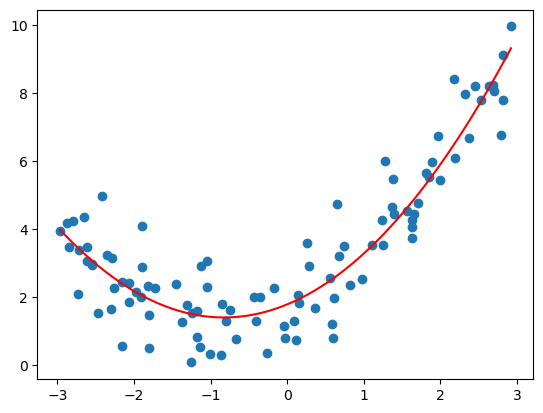

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_


plt.scatter(X,y)
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)
plt.plot(X_test, y_pred, 'r-')

